In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
pd.options.display.max_columns = 999

In [2]:
data = pd.read_csv('FINAL DATA - Sheet1.csv')

In [3]:
data.iloc[1:5,:]

,AllFuelsGen,CoalGen,PetroleumGen,NatGasGen,OtherGasGen,NuclearGen,HydroGen,RenewablesGen,HydroStorageGen,OtherGen,GeothermalGen,IndepGen,GDP,AvgTemp,AvgMaxTemp,AvgRelHum,Price,HydroCons,GeoCons,SolarCons,WindCons,WoodCons,WasteCons,BiofuelsCons,BiomassCons,RenCons,NatGasPrice,ResNatGasPrice,CommNatGasPrice,IndNatGasPrice,ElecPowerNatGasPrice,ElecPowerElecNetGen,CommElecNetGen,IndElecNetGen,TotElecNetGen,ElecImports,ElecExports,ElecNetImports,TDLosses,RetailElecSales,DirectElecUse,EndElecUse,ResPrice,CommPrice,IndPrice,AvgRetailPrice,ResNatGasCons,CommNatGasCons,IndLPNatGasCons,OtherIndNatGasCons,OtherNonCHPIndNatGasCons,TotIndOtherNatGasCons,TotIndNatGasCons,PDTransNatGasCons,FuelTransNatGasCons,TotTransNatGasCons,ElecPowerNatGasCons,TotNatGasCons,ElecCoalCons,ElecNatGasCons,TotRetailElecSales,TotCoalCons,CA_GDP,CoalCap,LargeHydroCap,NatGasCap,NuclearCap,OilCap,BiomassCap,GeothermalCap,SmallHydroCap,SolarPVCap,SolarThermalCap,WindCap,TotalElecCap
1,14380.39,184.14,175.65,8870.58,101.84,2229.87,1290.01,1504.66,-172.96,17.30,951.16,951.21,1637.15,50.04,57.29,71.37,9.63,180.55,12.81,3.40,4.46,155.97,27.21,20.08,203.26,404.48,7.08,10.26,9.80,7.21,7.18,270.97,0.55,11.42,282.94,3.32,2.85,0.46,-1.35,272.32,12.43,284.76,8.04,7.51,4.81,6.87,780.48,422.41,86.82,98.42,541.61,640.03,726.85,65.77,1.12,66.89,312.84,2309.46,82.33,82259.19,18305.56,138.33,1637.15,429.0,11836.75,30567.83,4456.0,563.08,1142.67,2624.83,1750.42,2.0,407.33,1534.83,55540.83
2,15848.63,102.50,119.55,9474.18,103.13,2468.63,1764.77,1788.32,-152.66,16.49,1052.63,1052.67,1636.24,56.12,67.10,77.43,9.89,211.59,14.21,4.83,5.50,168.14,30.32,21.55,220.01,456.13,6.10,9.85,9.14,6.30,5.91,287.70,0.55,12.45,300.71,3.53,1.79,1.73,19.62,269.32,13.51,282.83,8.32,7.70,4.87,7.01,681.88,375.69,96.44,107.76,557.16,664.92,761.36,63.63,1.24,64.86,362.84,2246.63,43.27,87836.61,21351.41,108.27,1636.24,429.0,11825.50,30760.67,4456.0,561.17,1142.33,2624.67,1749.83,2.0,404.67,1535.67,55717.67
3,15841.02,205.59,90.02,9208.77,92.26,2318.67,2096.46,1797.49,-143.87,13.42,966.04,966.08,1635.32,54.87,65.57,72.80,9.88,186.13,13.16,5.37,7.08,163.97,30.12,18.71,212.80,424.53,6.30,10.16,9.01,6.08,5.82,265.86,0.55,11.67,278.08,3.79,1.42,2.38,13.43,254.33,12.70,267.02,8.46,7.73,4.87,7.02,400.73,255.36,92.60,100.58,521.48,622.05,714.66,50.74,1.20,51.93,384.49,1807.17,90.97,84775.23,18855.60,155.97,1635.32,429.0,11814.25,30953.50,4456.0,559.25,1142.00,2624.50,1749.25,2.0,402.00,1536.50,55894.50
4,16874.50,200.48,103.19,9698.87,108.04,1667.93,3045.22,1831.97,34.61,16.19,960.34,960.37,1634.40,66.45,81.29,72.58,9.82,198.14,12.98,6.32,6.56,161.46,29.83,19.58,210.86,434.87,5.77,11.14,9.19,5.46,5.29,288.17,0.58,11.75,300.49,4.42,1.55,2.87,26.11,264.44,12.80,277.25,8.83,7.77,5.00,7.17,209.33,164.15,94.98,103.46,473.07,576.53,671.51,42.24,1.24,43.47,433.92,1522.38,86.68,87603.94,19862.26,149.68,1634.40,429.0,11803.00,31146.33,4456.0,557.33,1141.67,2624.33,1748.67,2.0,399.33,1537.33,56071.33


In [4]:
data.shape

(199, 75)

In [5]:
feature_gen = [x for x in data.columns.tolist()  if 'Gen' in x] # Generation?
feature_gen

['AllFuelsGen',
 'CoalGen',
 'PetroleumGen',
 'NatGasGen',
 'OtherGasGen',
 'NuclearGen',
 'HydroGen',
 'RenewablesGen',
 'HydroStorageGen',
 'OtherGen',
 'GeothermalGen',
 'IndepGen',
 'ElecPowerElecNetGen',
 'CommElecNetGen',
 'IndElecNetGen',
 'TotElecNetGen']

In [6]:
feature_cons = [x for x in data.columns.tolist()  if 'Cons' in x ] # Consumption?
feature_cons

['HydroCons',
 'GeoCons',
 'SolarCons',
 'WindCons',
 'WoodCons',
 'WasteCons',
 'BiofuelsCons',
 'BiomassCons',
 'RenCons',
 'ResNatGasCons',
 'CommNatGasCons',
 'IndLPNatGasCons',
 'OtherIndNatGasCons',
 'OtherNonCHPIndNatGasCons',
 'TotIndOtherNatGasCons',
 'TotIndNatGasCons',
 'PDTransNatGasCons',
 'FuelTransNatGasCons',
 'TotTransNatGasCons',
 'ElecPowerNatGasCons',
 'TotNatGasCons',
 'ElecCoalCons',
 'ElecNatGasCons',
 'TotCoalCons']

In [7]:
feature_price = [x for x in data.columns.tolist()  if 'Price' in x ]
feature_price

['Price',
 'NatGasPrice',
 'ResNatGasPrice',
 'CommNatGasPrice',
 'IndNatGasPrice',
 'ElecPowerNatGasPrice',
 'ResPrice',
 'CommPrice',
 'IndPrice',
 'AvgRetailPrice']

In [8]:
feature_cap = [x for x in data.columns.tolist()  if 'Cap' in x ]
feature_cap

['CoalCap',
 'LargeHydroCap',
 'NatGasCap',
 'NuclearCap',
 'OilCap',
 'BiomassCap',
 'GeothermalCap',
 'SmallHydroCap',
 'SolarPVCap',
 'SolarThermalCap',
 'WindCap',
 'TotalElecCap']

In [9]:
Other_features = ['GDP',
                  'AvgTemp',
                  'AvgMaxTemp',
                  'AvgRelHum',
                  'ElecImports',
                  'ElecExports',
                  'TDLosses', # Vad ar det?
                  'RetailElecSales',
                  'DirectElecUse',
                  'EndElecUse', # Fyfan, Vad ar den?
                  'TotRetailElecSales',
                  'CA_GDP']

In [10]:
data1 = pd.read_csv('final.csv')

In [11]:
data1.head()

,Month,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,GenCalifornia...other.thousand.megawatthours,GenCalifornia..Geothermal.electricity.Total,GenCalifornia..Geothermal.electric.utility,GenCalifornia..Independent.Power.producers,GDP,Av.Temp,Av.Daily.Max,Av.Rel.Humid,PrCalifornia...all.sectors.cents.per.kilowatthour,Bio.Prod.Trillion.BTU.,BioMass.Prod.Trill.BTU.,Total.RenProd..TrillBtu.,Hydro.Consumption.TrillBtu.,GeoConsump.TrillBtu.,Solar.Consump.TrillionBTU.,WindConsump.TrillBTU.,WoodConsump..TrillBTU.,WasteConsump.TrillBTU.,Biofuels.Consump.TrillBTU.,Total.Biomass.Consump.TrillBTU.,Total.Renewable.Consump.TrillBTU.,Natural.Gas.Price..Citygate..Dollars.per.Thousand.Cubic.Feet.,Natural.Gas.Price..Delivered.to.Consumers..Residential..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Residential.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Commercial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Commercial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Delivered.to.Consumers..Industrial..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Industrial.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Natural.Gas.Price..Electric.Power.Sector..Dollars.per.Thousand.Cubic.Feet.,Percentage.of.Electric.Power.Sector.Consumption.for.Which.Price.Data.Are.Available..Percent.,Electricity.Net.Generation..Electric.Power.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Industrial.Sector..Billion.Kilowatthours.,Electricity.Net.Generation..Total..Billion.Kilowatthours.,Electricity.Imports..Billion.Kilowatthours.,Electricity.Exports..Billion.Kilowatthours.,Electricity.Net.Imports..Billion.Kilowatthours.,Transmission.and.Distribution.Losses.and.Unaccounted.for..Billion.Kilowatthours.,Electricity.Retail.Sales..Total..Billion.Kilowatthours.,Electricity.Direct.Use..Billion.Kilowatthours.,Electricity.End.Use..Total..Billion.Kilowatthours.,Average.Retail.Price.of.Electricity..Residential..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Commercial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Industrial..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Transportation..Cents.per.Kilowatthour...Including.Taxes.,Average.Retail.Price.of.Electricity..Total..Cents.per.Kilowatthour...Including.Taxes.,Natural.Gas.Consumed.by.the.Residential.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Commercial.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Lease.and.Plant.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Non.CHP..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Other.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Industrial.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.pe

In [12]:
data['Month'] =[data1.loc[np.argmin(np.abs(data1['GenCalifornia...all.fuels..utility.scale..thousand.megawatthours'] - x)),'Month']
                 for x in data['AllFuelsGen'].tolist()]

In [13]:
data['Month'] = data['Month'].map(lambda x: pd.to_datetime(x.split('-')[0]+'-01-'+x.split('-')[1])) 

In [14]:
data_train = data[data['Month']<'2015-01-01']

In [15]:
data_train.shape

(168, 76)

In [16]:
data_test = data[(data['Month']<'2017-01-01') & (data['Month']>'2014-12-01')]

In [17]:
data_test.shape

(24, 76)

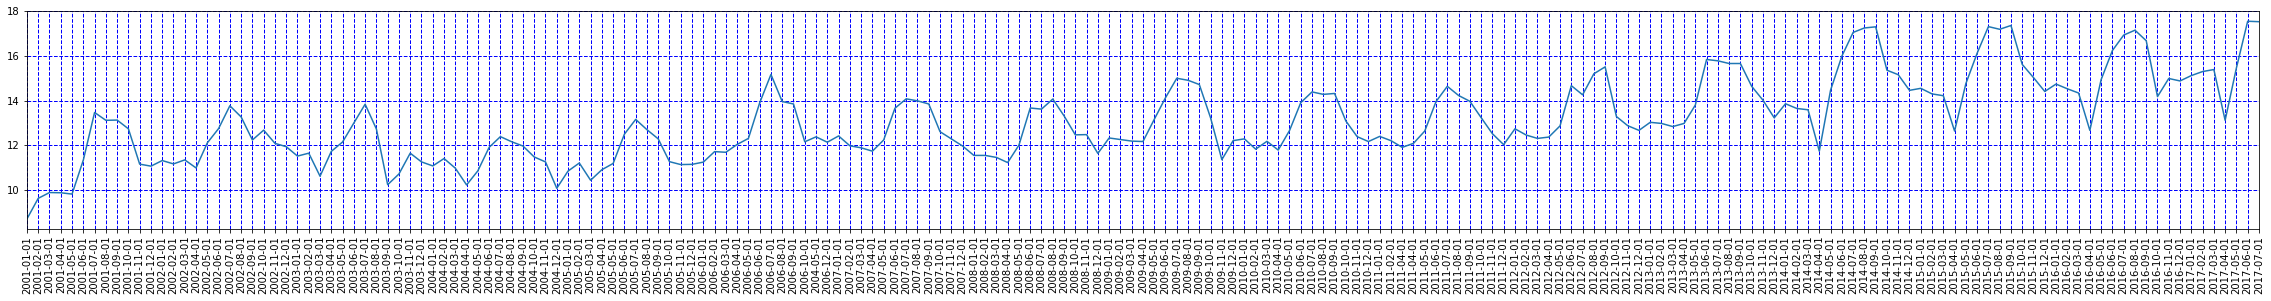

In [18]:
plt.figure(figsize = (40,4))
data['Price'].plot()
plt.grid(color='b', linestyle='--', linewidth=1)
plt.xticks(range(len(data['Price'])),data['Month'].map(lambda x: x.date()),rotation=90)
plt.show()